In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [33]:
df = pd.read_pickle("cleaned_df.pkl")

<BarContainer object of 20 artists>

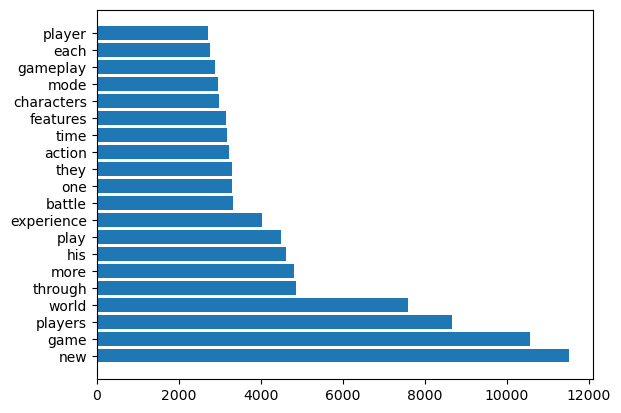

In [34]:
# what are the 20 most frequent words in all summaries?
most_freq = Counter(" ".join(df["summary"]).split()).most_common(20)
most_freq = dict(most_freq)
plt.barh(list(most_freq.keys()),list(most_freq.values()))

In [36]:
# Sort by the highest rated games according to users (user_review)?
df = df.sort_values('user_review',ascending=False,ignore_index=True)

<BarContainer object of 20 artists>

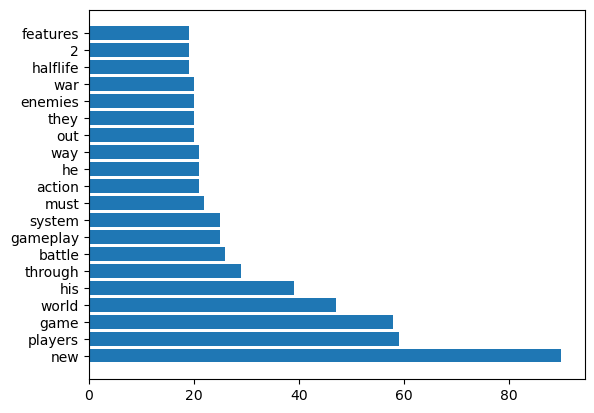

In [38]:
# what are the 20 most frequent words in the 100 games with highest user review?
most_freq_top = Counter(" ".join(df["summary"][0:100]).split()).most_common(20)
most_freq_top = dict(most_freq_top)
plt.barh(list(most_freq_top.keys()),list(most_freq_top.values()))

In [65]:
# create empty df to fill with whether or not each game's summary contains each word
df_words = pd.DataFrame(df[["name","user_review"]],columns = ["name","user_review"]+list(most_freq_top.keys()))
df_words.head()

,name,user_review,new,players,game,world,his,through,battle,gameplay,...,action,he,way,out,they,enemies,war,halflife,2,features
0,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ghost Trick: Phantom Detective,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GrimGrimoire,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Metal Torrent,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rochard,9.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# fill data frame with whether the game contains the word (T or F)
for i in range(len(df)):
    for j in list(most_freq_top.keys()):
        if j in df["summary"][i]:
            df_words[j][i] = True
        else:
            df_words[j][i] = False

/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_37040/1557505098.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_words[j][i] = False
/var/folders/xx/s138h7zs36sdpnp0qvy3wk2m0000gn/T/ipykernel_37040/1557505098.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_words[j][i] = True


In [134]:
df_words

,name,user_review,new,players,game,world,his,through,battle,gameplay,...,action,he,way,out,they,enemies,war,halflife,2,features
0,Z.H.P. Unlosing Ranger vs Darkdeath Evilman,9.7,False,True,False,False,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
1,Ghost Trick: Phantom Detective,9.7,True,False,True,True,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
2,GrimGrimoire,9.7,False,False,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False
3,Metal Torrent,9.7,False,True,True,True,False,True,True,False,...,True,True,False,True,False,True,True,False,False,False
4,Rochard,9.7,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17336,Warcraft III: Reforged,0.6,True,False,True,True,True,True,True,False,...,True,True,False,False,False,False,True,False,False,True
17337,Madden NFL 22,0.6,True,True,True,True,True,True,True,False,...,False,True,False,True,False,False,True,False,True,True
17338,Madden NFL 22,0.5,True,True,True,True,True,True,True,False,...,False,True,False,True,False,False,True,False,True,True
17339,Madden NFL 21,0.5,True,False,True,False,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False


In [131]:
# create df that contains the mean user review of games with and without the top words
from statistics import mean
df_words_aves = pd.DataFrame(columns = ["word","ave_with","ave_without"])
df_words_aves["word"] = df_words.columns[2:] # make each word a row
df_words_aves.head()
for i in list(most_freq_top.keys()):
    df_words_aves.loc[df_words_aves["word"] == i , "ave_with"] = mean(df_words.user_review[df_words[i] == True])
    df_words_aves.loc[df_words_aves["word"] == i , "ave_without"] = mean(df_words.user_review[df_words[i] == False])

In [132]:
df_words_aves.head()

,word,ave_with,ave_without
0,new,7.035483,6.963131
1,players,6.970404,6.999501
2,game,7.044731,6.929308
3,world,7.011636,6.979872
4,his,7.082446,6.961724
